In [1]:
import os
import pandas as pd
path = r"C:\Users\KRASNIQ\Documents\These_1.1\resultats"

In [2]:
files = []
for i in os.listdir(path):
    if os.path.isfile(os.path.join(path,i)) and 'resultats_40_' in i:
        files.append(i)

In [3]:
train_s1_20 = []
train_s1_30 = []
train_s1_40 = []
train_bagging = []
train_s2 = []

test_s1_20 = []
test_s1_30 = []
test_s1_40 = []
test_bagging = []
test_s2 = []

for i in files:
    data = pd.read_csv(i, sep=',')
    train_s1_20.append(data.iloc[0, 0])
    train_s1_30.append(data.iloc[1, 0])
    train_s1_40.append(data.iloc[2, 0])
    train_bagging.append(data.iloc[3, 0])
    train_s2.append(data.iloc[4, 0])

    test_s1_20.append(data.iloc[0, 1])
    test_s1_30.append(data.iloc[1, 1])
    test_s1_40.append(data.iloc[2, 1])
    test_bagging.append(data.iloc[3, 1])
    test_s2.append(data.iloc[4, 1])

In [4]:
dt = train_bagging + train_s1_20+train_s1_30+train_s1_40+train_s2 + test_bagging +test_s1_20 +test_s1_30+ test_s1_40 + test_s2 
name = ["Bagging"]*10 + ["Bag_1_20"]*10 + ["Bag_1_30"]*10 + ["Bag_1_40"]*10 + ["Bag_2"]*10 +["Bagging"]*10 + ["Bag_1_20"]*10 + ["Bag_1_30"]*10 + ["Bag_1_40"]*10 + ["Bag_2"]*10
train = ["Train"]*50 + ["Test"]*50

In [5]:
datafra = pd.DataFrame()
datafra['poisson']=dt
datafra['Models'] = name
datafra['Train/Test'] = train

In [6]:
datafra

,poisson,Models,Train/Test
0,29.381757,Bagging,Train
1,29.318086,Bagging,Train
2,29.284255,Bagging,Train
3,29.304483,Bagging,Train
4,29.361552,Bagging,Train
...,...,...,...
95,29.301101,Bag_2,Test
96,29.280185,Bag_2,Test
97,29.332641,Bag_2,Test
98,29.306424,Bag_2,Test


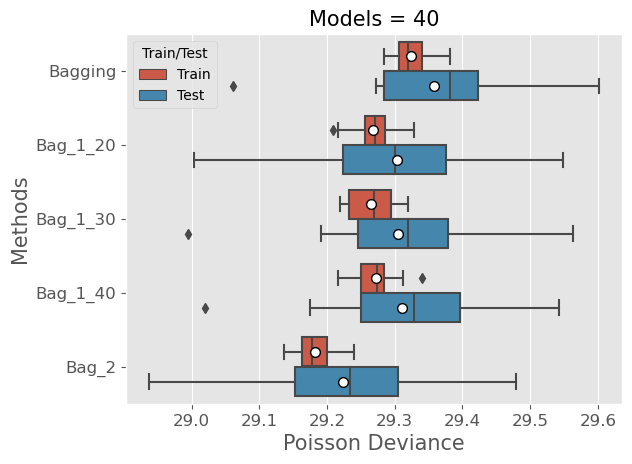

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

sns.boxplot(data=datafra, x='poisson', y='Models', hue="Train/Test", 
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"})
plt.xlabel('Poisson Deviance', fontsize=15)
plt.ylabel('Methods', fontsize=15)
plt.title('Models = 40', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show();

In [8]:
for j in  ["Bagging", "Bag_1_20", "Bag_1_30", "Bag_1_40", "Bag_2"]:
    for i in ['Train', 'Test']:
        print(j,i)
        print(datafra[(datafra['Train/Test'] == i) & (datafra['Models'] == j)]['poisson'].mean())
        print('\n')
        #print(datafra[(datafra['Train/Test'] == i) & (datafra['Models'] == j)]['poisson'].std())

Bagging Train
29.323880700000007


Bagging Test
29.357652099999996


Bag_1_20 Train
29.267313899999998


Bag_1_20 Test
29.303664100000002


Bag_1_30 Train
29.264687400000003


Bag_1_30 Test
29.3050789


Bag_1_40 Train
29.271983


Bag_1_40 Test
29.3102958


Bag_2 Train
29.1818043


Bag_2 Test
29.223130500000003




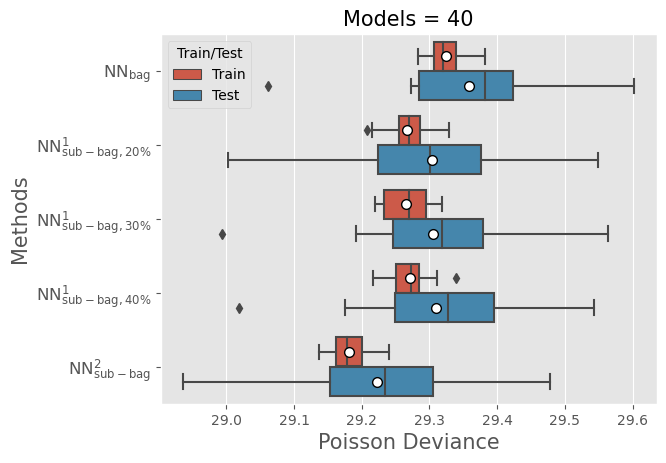

In [10]:
import matplotlib.pyplot as plt

import numpy as np

plt.style.use('ggplot')

cos = np.cos
pi  = np.pi

params = {'mathtext.default': 'regular' }  # Allows tex-style title & labels
plt.rcParams.update(params)


fig = plt.figure()

ax  = fig.add_subplot(1, 1, 1)

#t   = np.linspace(0.0, 2*pi, 100)

#s   = cos(t)
#plt.plot(t, s)

sns.boxplot(data=datafra, x='poisson', y='Models', hue="Train/Test", 
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"})
plt.xlabel('Poisson Deviance', fontsize=15)
plt.ylabel('Methods', fontsize=15)
plt.title('Models = 40', fontsize=15)


plt.yticks(fontsize=12)

plt.yticks(fontsize=12)

ax.set_yticks([0, 1,2,3, 4])

ax.set_yticklabels([r"NN$_{bag}$", r"NN$_{sub-bag, 20\%}^{1}$", r"NN$_{sub-bag, 30\%}^{1}$", 
                    r"NN$_{sub-bag, 40\%}^{1}$", r"NN$_{sub-bag}^{2}$"])


#ax.set_xticks([0, pi/2, pi, 3*pi/2, 2*pi])

#ax.set_xticklabels(['$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])

plt.show()